In [1]:
import torch

layer = 2
lss_score = torch.load(f"../weights/linearity/lss/linearity_lss_pythia-70m_Layer-1_difference-in-means_safety_Layer2.pt")


In [2]:
# Find top 10 largest values and their indices
lss_score = torch.tensor(lss_score)
top_values, top_indices = torch.topk(lss_score, k=50)

print("Top 10 largest values:")
for i, (idx, val) in enumerate(zip(top_indices, top_values)):
    print(f"{i+1}. Index: {idx.item()}, Value: {val.item():.6f}")


Top 10 largest values:
1. Index: 567, Value: 2.643271
2. Index: 162, Value: 2.343719
3. Index: 334, Value: 2.154624
4. Index: 213, Value: 2.154624
5. Index: 25, Value: 2.094674
6. Index: 28, Value: 2.084730
7. Index: 6, Value: 2.049124
8. Index: 335, Value: 1.902188
9. Index: 214, Value: 1.902188
10. Index: 605, Value: 1.863306
11. Index: 536, Value: 1.863306
12. Index: 397, Value: 1.863306
13. Index: 489, Value: 1.862539
14. Index: 525, Value: 1.862539
15. Index: 27, Value: 1.860204
16. Index: 284, Value: 1.814180
17. Index: 153, Value: 1.732722
18. Index: 351, Value: 1.726173
19. Index: 479, Value: 1.709692
20. Index: 241, Value: 1.695404
21. Index: 256, Value: 1.690521
22. Index: 355, Value: 1.656294
23. Index: 612, Value: 1.651462
24. Index: 512, Value: 1.639426
25. Index: 486, Value: 1.631036
26. Index: 541, Value: 1.622060
27. Index: 204, Value: 1.617771
28. Index: 187, Value: 1.611400
29. Index: 166, Value: 1.607408
30. Index: 596, Value: 1.607408
31. Index: 122, Value: 1.606323

In [3]:
# Find top 10 largest values and their indices
lss_score = torch.tensor(lss_score)
bottom_values, bottom_indices = torch.topk(lss_score, k=50, largest=False)

print("Top 10 largest values:")
for i, (idx, val) in enumerate(zip(bottom_indices, bottom_values)):
    print(f"{i+1}. Index: {idx.item()}, Value: {val.item():.6f}")


Top 10 largest values:
1. Index: 40, Value: 1.000064
2. Index: 272, Value: 1.000088
3. Index: 372, Value: 1.000107
4. Index: 22, Value: 1.000234
5. Index: 508, Value: 1.001872
6. Index: 173, Value: 1.002115
7. Index: 587, Value: 1.002568
8. Index: 560, Value: 1.003388
9. Index: 75, Value: 1.003826
10. Index: 413, Value: 1.005238
11. Index: 578, Value: 1.006300
12. Index: 292, Value: 1.006327
13. Index: 363, Value: 1.007012
14. Index: 354, Value: 1.007452
15. Index: 50, Value: 1.007975
16. Index: 600, Value: 1.008695
17. Index: 633, Value: 1.008923
18. Index: 634, Value: 1.009358
19. Index: 49, Value: 1.009575
20. Index: 89, Value: 1.009872
21. Index: 349, Value: 1.010616
22. Index: 37, Value: 1.010620
23. Index: 381, Value: 1.011342
24. Index: 48, Value: 1.012845
25. Index: 137, Value: 1.012917
26. Index: 279, Value: 1.013258
27. Index: 376, Value: 1.013311
28. Index: 325, Value: 1.013493
29. Index: 43, Value: 1.013546
30. Index: 427, Value: 1.013689
31. Index: 561, Value: 1.013879
32.

/tmp/ipykernel_550056/1344376006.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lss_score = torch.tensor(lss_score)


In [4]:
import datasets

dataset = datasets.load_dataset("json", data_files="../assets/harmbench/harmful_data.jsonl")["train"]

/home/xzascc/Documents/code/MultipleDirections/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m")

In [6]:
token_id_list = []
for example in dataset:
    context = example["instruction"]
    input_ids = tokenizer(context, return_tensors="pt").input_ids
    token_id_list.extend(input_ids[0].tolist())

In [8]:
for idx in top_indices:
    print(tokenizer.decode(token_id_list[idx]))


 false
 and
by
by
 step
-
 financial
-
-
struct
struct
struct
struct
struct
by
 identity
 login
 personal
 or
 instructions
 IoT
us
 to
du
 own
 homemade
 it
 sour
ach
ach
 spread
ach
 information
 without
 and
 and
 false
 about
 cyber
 spread
 stock
 materials
 search
harm
 theft
 manipulate
 and
 a
 tutorial
 tutorial


In [9]:
for idx in bottom_indices:
    print(tokenizer.decode(token_id_list[idx]))

Expl
Prov
Prov
Prov
 ph
bul
 glor
 manip
 dis
 autom
 a
 evade
 autom
 uns
 sensitive
 steal
 steal
 a
 steal
 a
 ste
 secure
 to
 to
-
 steal
 how
 secure
 vulnerability
 ph
ulates
 violence
 religion
 steal
 the
 or
 of
 chaos
ack
 steal
 into
 damage
 a
 enforcement
 how
 how
 database
 cause
 the
cing


In [11]:
diff = torch.load(f"../weights/linearity/lss/linearity_diff_larger_than_2_pythia-70m_Layer2.pt")

In [ ]:
diff_tensor = torch.tensor(diff)
mean_diff = torch.mean(diff_tensor, dim=0)
std_diff = torch.std(diff_tensor, dim=0)
print(mean_diff.shape)
print(std_diff.shape)

torch.Size([1000])
torch.Size([1000])


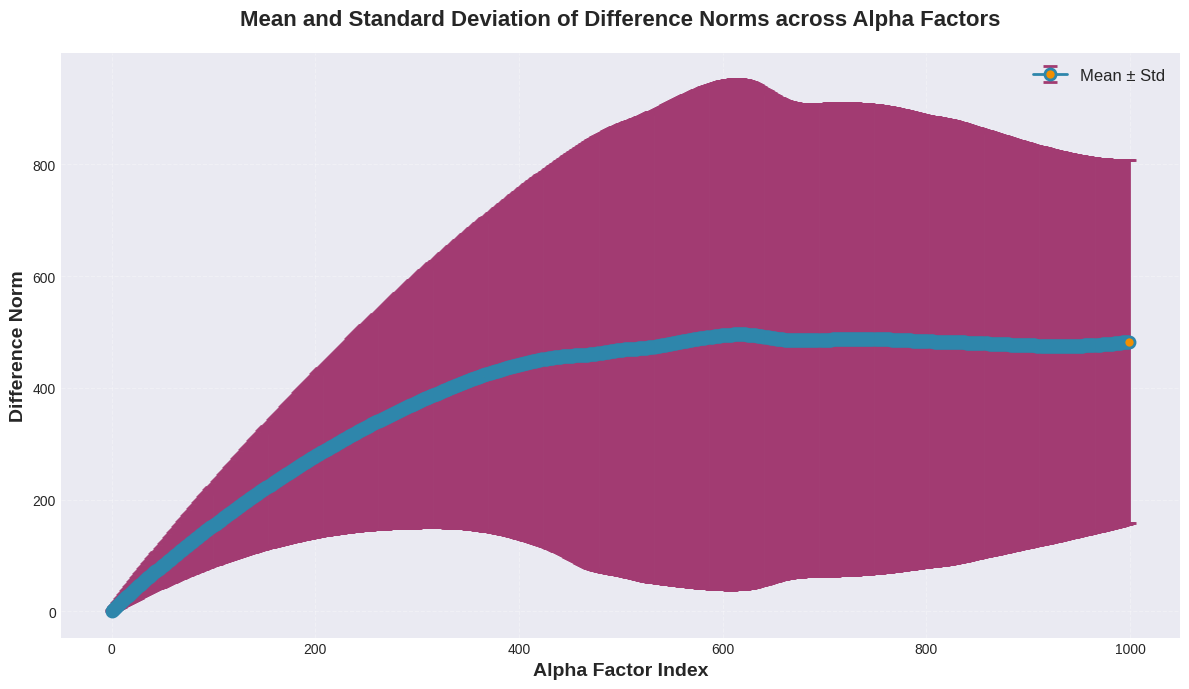

In [19]:
import matplotlib.pyplot as plt

# Set style for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(12, 7))

# Create error bar plot with enhanced styling
x_values = range(len(mean_diff))
plt.errorbar(x_values, mean_diff, yerr=std_diff, 
             fmt='o-', capsize=5, capthick=2, 
             linewidth=2, markersize=8,
             color='#2E86AB', ecolor='#A23B72', 
             markerfacecolor='#F18F01', markeredgewidth=2, markeredgecolor='#2E86AB',
             label='Mean ± Std')

# Enhance labels and title
plt.xlabel('Alpha Factor Index', fontsize=14, fontweight='bold')
plt.ylabel('Difference Norm', fontsize=14, fontweight='bold')
plt.title('Mean and Standard Deviation of Difference Norms across Alpha Factors', 
          fontsize=16, fontweight='bold', pad=20)

# Improve grid and legend
plt.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
plt.legend(fontsize=12, loc='best', framealpha=0.9)

# Add tight layout for better spacing
plt.tight_layout()
plt.savefig('mean_std_diff_pythia-70m_Layer2.pdf', dpi=300)
plt.show()
